**<h1><center>Lab-09:Report </center></h1>**

**<h1><center>EE5175: Image Signal Processing </center></h1>**


<h4><center>Under the guidence of </center></h4>
<h4><center>Prof. AN.Rajagopalan </center></h4>

<center>By EE21S048</center>

<h9>Date of submission: 04-04-2022<h9>

---

#**Otsu’s thresholding & K-Means Clustering:**

**Import the Libraries:**

In [1]:
from numpy import *
import sys
import cv2
import math
import matplotlib.pyplot as plt
#from imageio import imread
import numpy as np

**Read the Images**

194 259
200 175
132 208
196 400


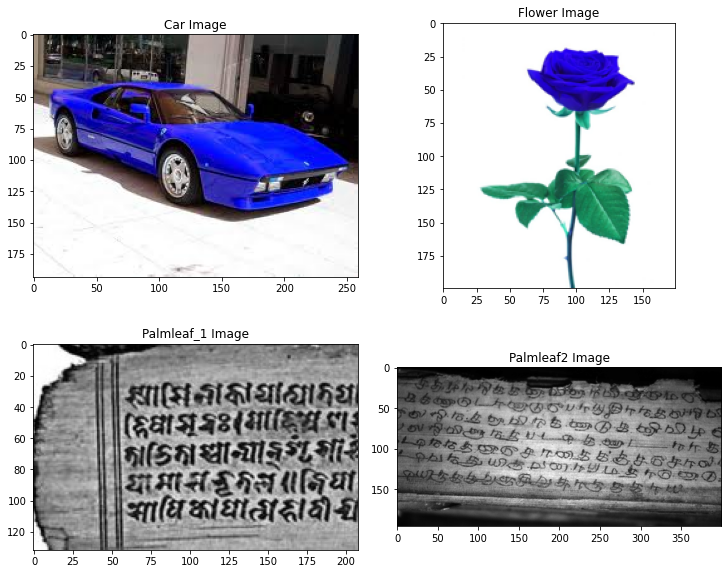

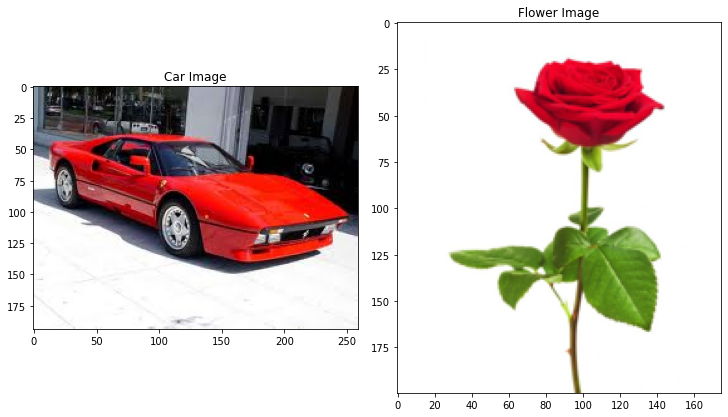

In [2]:
img1= cv2.imread("car.ppm")
width1, height1,z1= img1.shape    
print(width1, height1)

img2= cv2.imread("flower.png")
width2,height2,z2= img2.shape  
print(width2, height2)

img3= cv2.imread("palmleaf1.pgm",0)
width3,height3= img3.shape  
print(width3, height3)

img4= cv2.imread("palmleaf2.pgm",0)
width4,height4= img4.shape  
print(width4, height4)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8), constrained_layout=True)
ax1.imshow(img1)                #displaying gray scale image
ax1.title.set_text("Car Image")     #setting title to the figure
ax2.imshow(img2)       
ax2.title.set_text("Flower Image")
ax3.imshow(img3,'gray')       
ax3.title.set_text("Palmleaf_1 Image")
ax4.imshow(img4,'gray')
ax4.title.set_text("Palmleaf2 Image")

import imageio
imageio.plugins.freeimage.download()
#from imageio import imread
car = imageio.imread('car.ppm',format='PPMRAW-FI')
flower = imageio.imread('flower.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8), constrained_layout=True)
ax1.imshow(car)                #displaying gray scale image
ax1.title.set_text("Car Image")     #setting title to the figure
ax2.imshow(flower)       
ax2.title.set_text("Flower Image")

#palm_leaf_1 = imread('palmleaf1.pgm')
#palm_leaf_2 = imread('palmleaf2.pgm')

##**Global Thresholding Using Otsu's Method:**
* Consider an image has $L$ possible intensity levels. We choose a threshold $t$ to segment the image into two parts. Clearly
$$
0\leq t\leq L-1
$$
* Let $F_{i}$ represent the number of times intensity $i$ occurs in the image. Define class 1 ($C_{1}$) as the set of pixels satisfying $\{i : 0\leq i \leq t\}$ and class 2 ($C_{2}$) as the set of pixels satisfying $\{i : t< i \leq L-1\}$. Let the number of pixels in $C_{1}$ and $C_{2}$ be $N_{1}$ and $N_{2}$ respectively. 
* The means and variances of class $j$, $\mu_{j}$ and $\sigma_{j}^{2}$, are defined as

$$
\mu_{j} = \frac{\Sigma_{i\in C_{j}}iF_{i}}{N_{j}}
$$

$$
\sigma^{2}_{j} = \frac{\Sigma_{i \in C_{j}}(i-\mu_{j})^{2}F_{i}}{N_{j}}
$$

* Also, the means and variances of the entire image, $\mu_{G}$ and $\sigma^{2}_{G}$, are defined as
$$
\mu_{G} = \frac{\Sigma_{i=0}^{L-1}iF_{i}}{N}
$$
$$
\sigma^{2}_{G} = \frac{\Sigma_{i=0}^{L-1}(i-\mu_{G})^{2}F_{i}}{N}
$$ 
$N$ is the total number of pixels in the image.

* The within class variance, $\sigma^{2}_{w}$, is defined as

$$
\sigma^{2}_{w} = \frac{\Sigma_{j=1}^{2}\sigma_{j}^{2}N_{j}}{N}
$$

* The between class variance, $\sigma_{b}^{2}$ is defined as 

$$
\sigma^{2}_{b} = \frac{\Sigma_{j=1}^{2}(\mu_{j}-\mu_{G})^{2}N_{j}}{N}
$$

* It is clear that the terms defined above are functions of $t$. $t$ has been skipped for notational brevity. It can be shown that the between class variance can be rewritten as 
$$
\sigma^{2}_{b} = \frac{(\mu_{G}P_{1}-m)^{2}}{P_{1}(1-P_{1})}
$$
$P_{1}$ and $m$ are given as

$$
P_{1} = \frac{N_{1}}{N}
$$

$$
m = \frac{\Sigma_{i\in C_{1}}iF_{i}}{N} = \frac{\mu_{1}N_{1}}{N}
$$

* The optimal threshold $t^{*}$ from Otsu's method is given by

$$
t^{*} = argmax_{0\leq t \leq L-1} \sigma^{2}_{b}(t) = argmin_{0\leq t \leq L-1} \sigma^{2}_{w}(t)
$$
* **Reference:** The complete derivation can be found in section 10.3.3 of Digital Image Processing, Third Edition by Rafael C. Gonzalez and Richard E. Woods.

In [3]:
def otsu_binary_thresholding(image):
  
    thresholds =unique(image)            # get the sorted set of intensity values in the image 
    threshold = thresholds[0] 
    final_threshold = thresholds[0]
      
    if len(thresholds)== 1:              # if there is only 1 value, no thresholding is possible
        return 0
    elif len(thresholds)== 2:            # if there are 2 intensity values, the threshold must lie in the middle of them
        return mean(thresholds)
    
    N = size(image)                    # number of pixels in the image    
    mu_t =mean(image)                  # image mean
    N1 = sum(image == final_threshold) # initialize pixels in class 1
    
    cumsum = N1*threshold              # initialize the cummulative sum
    m = threshold                      # m as defined above                                 
    sigma_b = (mu_t*(N1/N)-m)**2/((N1/N)*(1-N1/N))      # initialize sigma_b and best_sigma
    best_sigma_b = sigma_b

    for i in range(1, len(thresholds)-1):
        threshold = thresholds[i]
        Ni = sum(image == threshold)
        N1 = N1 + Ni                         # update pixels in class 1      
        cumsum = cumsum + Ni*threshold       # update the cummulative sum      
        m = cumsum/N                         # recalculate m and sigma_b         
        sigma_b = (mu_t*(N1/N)-m)**2/((N1/N)*(1-N1/N))   # if sigma_b is higher than the previous best, update best threshold and best_sigma_b
        
        if sigma_b >= best_sigma_b:
            best_sigma_b = sigma_b
            final_threshold = (thresholds[i] + thresholds[i+1])/2
    return final_threshold

In [4]:
Thres1 = otsu_binary_thresholding(img3)
print(f"The threshold obtained for 'palmleaf1.pgm' is : {Thres1}")
Thres2 = otsu_binary_thresholding(img4)
print(f"The threshold obtained for 'palmleaf2.pgm' is : {Thres2}")
img3_binary=zeros(shape(img3), dtype=float)
img3_binary[img3 >=Thres1] = 1
img4_binary=zeros(shape(img4), dtype=float)
img4_binary[img4 >=Thres2] = 1

The threshold obtained for 'palmleaf1.pgm' is : 104.5
The threshold obtained for 'palmleaf2.pgm' is : 50.5


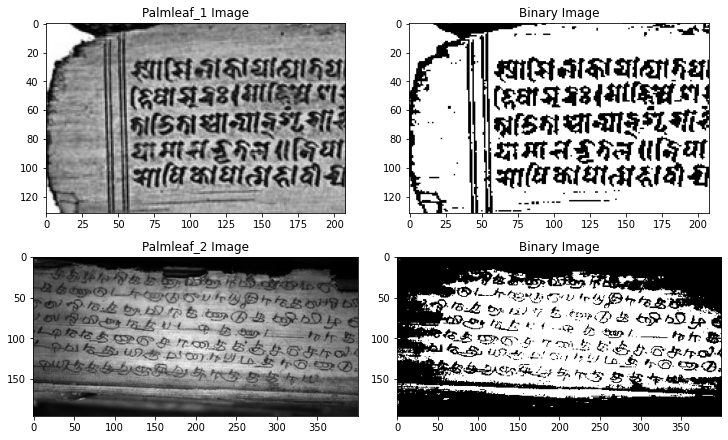

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,6), constrained_layout=True)
ax1.imshow(img3,'gray')                    #displaying gray scale image
ax1.title.set_text("Palmleaf_1 Image")     #setting title to the figure
ax2.imshow(img3_binary,'gray')       
ax2.title.set_text("Binary Image")
ax3.imshow(img4,'gray')       
ax3.title.set_text("Palmleaf_2 Image")
ax4.imshow(img4_binary,'gray')
ax4.title.set_text("Binary Image")

##**K-Means Clustering:**

**Steps in K-Means algorithm:**
* Choose the number of clusters K.
* Select at random K points, the centroids(not necessarily from your dataset).
* Assign each data point to the closest centroid → that forms K clusters.
* Compute and place the new centroid of each cluster.
* Reassign each data point to the new closest centroid.

In [6]:
def k_means_classifier(data, centroids=None, k_means=3, max_iter=5, n_inits=30,
                       low=0, high=255, tolerance=1e-12, flattened=False, rgb=True,
                       return_centroids=False, seed=None):
    if seed is not None:
        random.seed(seed)                          # set a seed
    if not flattened:       
        x, y, _ = shape(data)
        flattened_image = zeros((x*y, 3))          # flatten the data if it is not flattened
        for i in range(3):
            flattened_image[:, i] =ravel(data[:, :, i])
    data=flattened_image
    n_samples, n_features =shape(data)             
    labels =random.randint(low=0, high=k_means, size=n_samples)   # randomly initialize labels
    distances=zeros((k_means, n_samples))                         # initialize distances
    if centroids is not None:                                     # for the case when initial points is provided
        for i in range(max_iter):
            for k in range(k_means):              
                                                             # centroids[k] is the kth centroid
                c = centroids[k]                             # centroids is of the shape (k_means, n_features)              
                distances[k] =sum((data - c)**2, axis=1)     # get the distance of each point from a centroid        
            new_labels = argmin(distances, axis=0)           # get new labels based on distances to centroids calculated
                                                             # check for convergence
            if (mean(abs(labels-new_labels)) <= tolerance):
                labels = new_labels                          # if convergence has taken place, assign labels and exit
                break
            else:
                labels = new_labels                          # else update labels
                for c in range(k_means):
                    centroids[c] =mean(data[labels == c], axis=0) # update centroids
    
    else:                                                    # when initial points is not provided
        
        best_cost = inf                                      # initialize variables
        centroids = zeros((k_means, n_features))
        best_labels = labels.copy()
        for n in range(n_inits):
            init = random.uniform(low, high, size=(k_means, n_features))  # for each run of k-means, randomly initiate centers
            for i in range(max_iter):
                for k in range(k_means):
                    c = init[k]
                    distances[k] = sum((data - c)**2, axis=1)
                new_labels = argmin(distances, axis=0)
                if (min(abs(labels-new_labels)) <= tolerance):
                    labels = new_labels
                    break
                else:
                    labels = new_labels
                    avaliable_labels = set(labels)
                    for c in range(k_means):                                        
                        if c in avaliable_labels:     # if a cluster has points, update the corresponding centroid
                            init[c] = mean(data[labels == c], axis=0)
                        # if there is a cluster with no points, randomly initiate the 
                        # corresponding center again. We could also choose to totally 
                        # ignore this and work with k_means-1 means but we are already 
                        # working with only 3 means and this would lead to pretty bad results
                        else:
                            init[c] = random.uniform(low, high, n_features)           
            cost =np.sum(np.min(distances), axis=0) # get the cost as the sum of the minimum distance of each point from some cluster center
            
            if cost < best_cost:         # update the cost, centroids and labels when you get a lower cost
                best_cost = cost
                centroids = init
                best_labels = labels
        labels = best_labels
    
    if not return_centroids:            # return centroids only if asked for
        return labels      
    else:
        return labels, centroids

In [7]:
def segment_rgb_image(image, centroids_=None, k_means=3, max_iter=5, n_inits=30, low=0,
                      high=255, tolerance=1e-12, flattened=False, set_centroids=False, seed=None):
    x, y, _ =shape(image)
    #flattened_image = flatten_image(image, rgb=True)

    flattened_image = zeros((x*y, 3))
    for i in range(3):
        flattened_image[:, i] =ravel(image[:, :, i])
    #data=flattened_image
    final_image =zeros_like(flattened_image)
    labels, centroids = k_means_classifier(data=image, centroids=centroids_, k_means=k_means, 
                                           max_iter=max_iter, n_inits=n_inits, low=low, high=high,
                                           tolerance=tolerance, flattened=flattened, rgb=True, 
                                           return_centroids=True, seed=seed)
    # get the labels present
    all_labels = set(labels)
    for label in all_labels:
        if not set_centroids:
            # in this case, to all pixels with label k, assign their average color
            final_image[labels == label] = mean(flattened_image[labels == label], axis=0)
        else:
            # in this case, to all pixels with label k, assign the kth centroid. The 
            # previous one often gives better results
            final_image[labels == label] = centroids[label]
    final_image = final_image/high
    return final_image.reshape(x, y, 3)

In [8]:
c_init = zeros((3, 3))
c_init[0, 0] = 255
c_init[2] = 255
print(c_init)

[[255.   0.   0.]
 [  0.   0.   0.]
 [255. 255. 255.]]


In [9]:
img11_seg=segment_rgb_image(car, centroids_=c_init, max_iter=5)
img21_seg=segment_rgb_image(flower, centroids_=c_init, max_iter=5)

In [10]:
img12_seg=segment_rgb_image(car, max_iter=5, seed=1791278654)
img22_seg=segment_rgb_image(flower, max_iter=5,seed=773890966)

In [11]:
img13_seg=segment_rgb_image(car, max_iter=5)
img23_seg=segment_rgb_image(flower, max_iter=5)

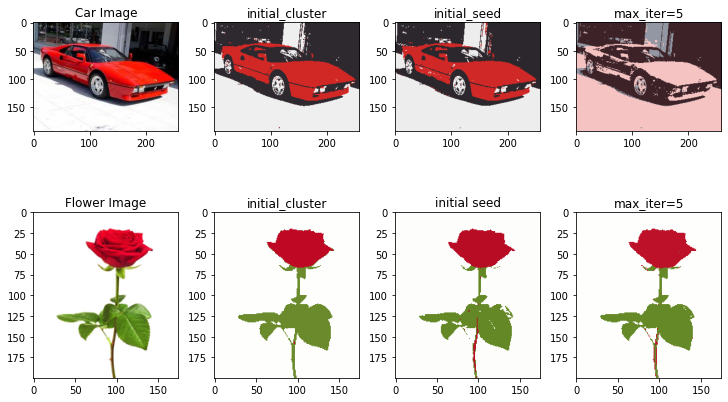

In [15]:
fig, ((ax1, ax2,ax3,ax4), (ax5, ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(10,6), constrained_layout=True)
ax1.imshow(car,'gray')                    #displaying gray scale image
ax1.title.set_text("Car Image")     #setting title to the figure
ax2.imshow(img11_seg,'gray')       
ax2.title.set_text("initial_cluster")
ax3.imshow(img12_seg,'gray')       
ax3.title.set_text("initial_seed")
ax4.imshow(img13_seg,'gray')
ax4.title.set_text("max_iter=5")
ax5.imshow(flower,'gray')       
ax5.title.set_text("Flower Image")
ax6.imshow(img21_seg,'gray')
ax6.title.set_text("initial_cluster")
ax7.imshow(img22_seg,'gray')       
ax7.title.set_text("initial seed")
ax8.imshow(img23_seg,'gray')
ax8.title.set_text("max_iter=5")

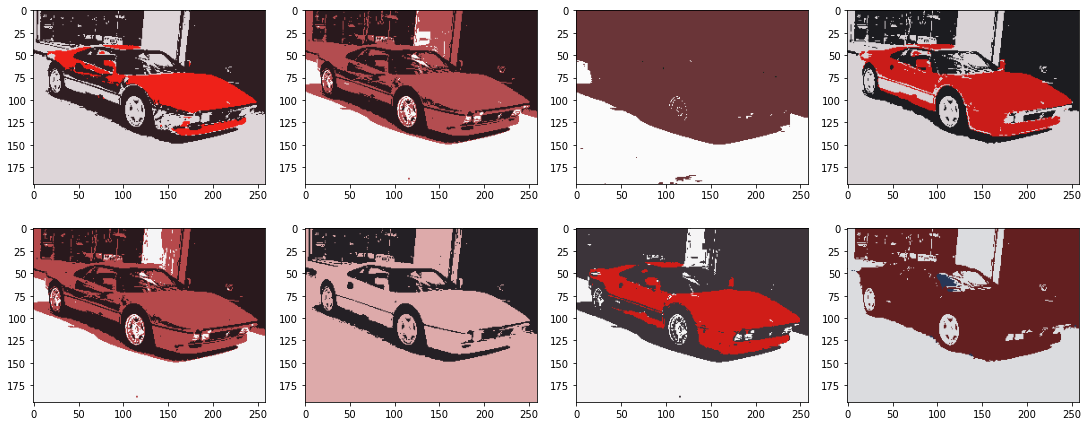

In [19]:
fig, ((ax1, ax2,ax3,ax4), (ax5, ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(15,6), constrained_layout=True)
ax1.imshow(segment_rgb_image(car, max_iter=5),'gray')                    #displaying gray scale image
ax2.imshow(segment_rgb_image(car, max_iter=5),'gray')       
ax3.imshow(segment_rgb_image(car, max_iter=5),'gray')       
ax4.imshow(segment_rgb_image(car, max_iter=5),'gray')
ax5.imshow(segment_rgb_image(car, max_iter=5),'gray')       
ax6.imshow(segment_rgb_image(car, max_iter=5),'gray')
ax7.imshow(segment_rgb_image(car, max_iter=5),'gray')       
ax8.imshow(segment_rgb_image(car, max_iter=5),'gray')


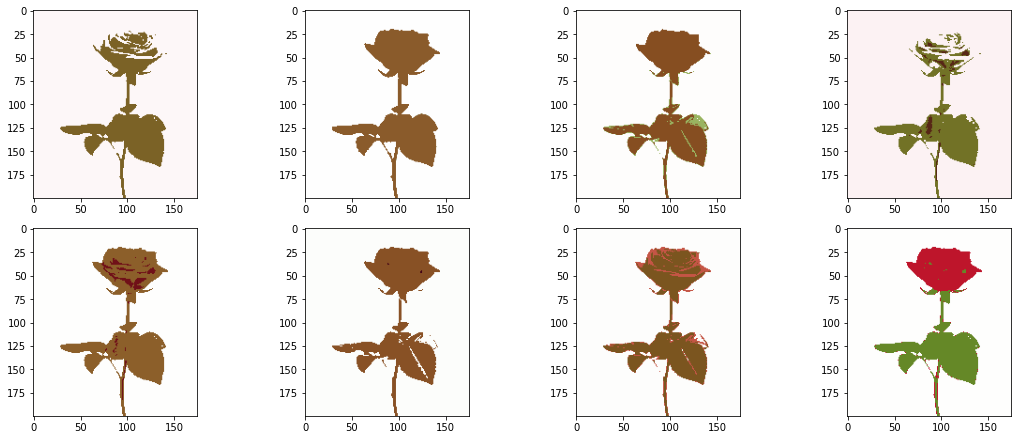

In [20]:
fig, ((ax1, ax2,ax3,ax4), (ax5, ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(15,6), constrained_layout=True)
ax1.imshow(segment_rgb_image(flower, max_iter=5),'gray') 
ax2.imshow(segment_rgb_image(flower, max_iter=5),'gray')
ax3.imshow(segment_rgb_image(flower, max_iter=5),'gray') 
ax4.imshow(segment_rgb_image(flower, max_iter=5),'gray') 
ax5.imshow(segment_rgb_image(flower, max_iter=5),'gray') 
ax6.imshow(segment_rgb_image(flower, max_iter=5),'gray') 
ax7.imshow(segment_rgb_image(flower, max_iter=5),'gray') 
ax8.imshow(segment_rgb_image(flower, max_iter=5),'gray')  

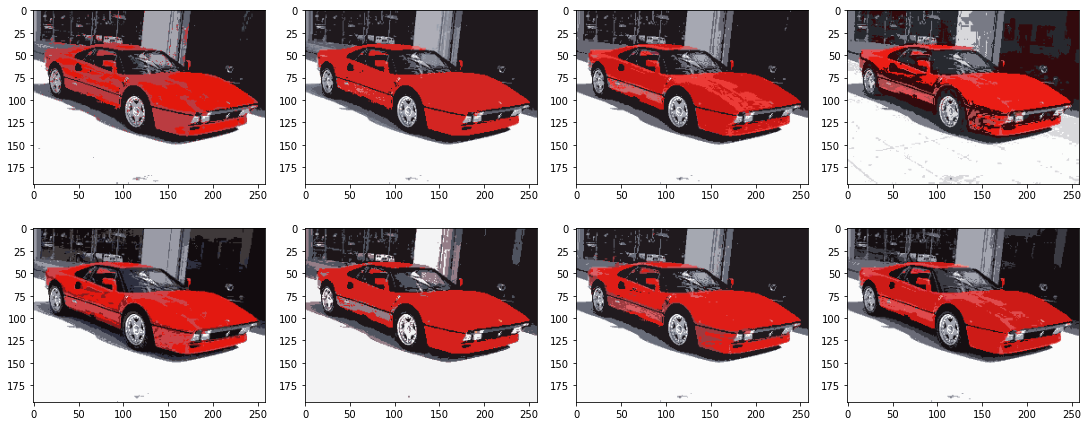

In [21]:
segment_rgb_image(car, max_iter=5)
fig, ((ax1, ax2,ax3,ax4), (ax5, ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(15,6), constrained_layout=True)
ax1.imshow(segment_rgb_image(car, max_iter=5, k_means=10),'gray')                    #displaying gray scale image
ax2.imshow(segment_rgb_image(car, max_iter=5, k_means=10),'gray')       
ax3.imshow(segment_rgb_image(car, max_iter=5, k_means=10),'gray')       
ax4.imshow(segment_rgb_image(car, max_iter=5, k_means=10),'gray')
ax5.imshow(segment_rgb_image(car, max_iter=5, k_means=10),'gray')       
ax6.imshow(segment_rgb_image(car, max_iter=5, k_means=10),'gray')
ax7.imshow(segment_rgb_image(car, max_iter=5, k_means=10),'gray')       
ax8.imshow(segment_rgb_image(car, max_iter=5, k_means=10),'gray')

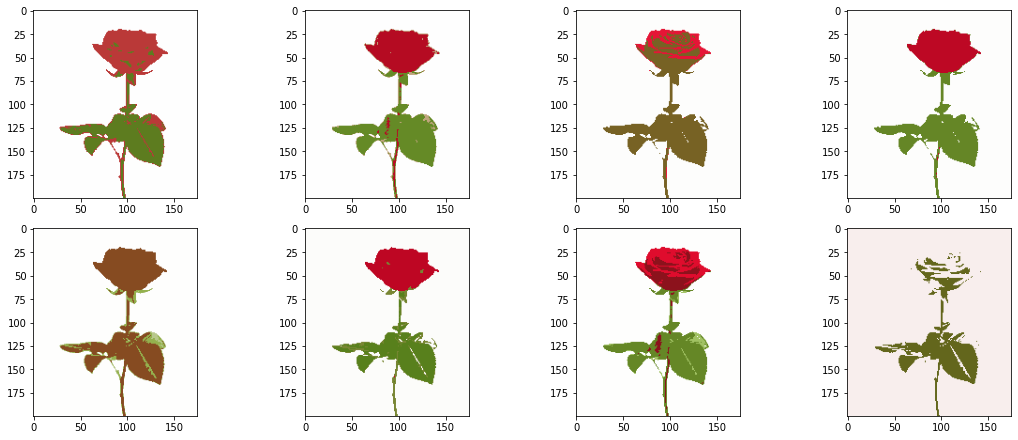

In [22]:
fig, ((ax1, ax2,ax3,ax4), (ax5, ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(15,6), constrained_layout=True)
ax1.imshow(segment_rgb_image(flower, max_iter=5, k_means=5),'gray') 
ax2.imshow(segment_rgb_image(flower, max_iter=5, k_means=5),'gray')
ax3.imshow(segment_rgb_image(flower, max_iter=5, k_means=5),'gray') 
ax4.imshow(segment_rgb_image(flower, max_iter=5, k_means=5),'gray') 
ax5.imshow(segment_rgb_image(flower, max_iter=5, k_means=5),'gray') 
ax6.imshow(segment_rgb_image(flower, max_iter=5, k_means=5),'gray') 
ax7.imshow(segment_rgb_image(flower, max_iter=5, k_means=5),'gray') 
ax8.imshow(segment_rgb_image(flower, max_iter=5, k_means=5),'gray')  

##**Conclusion:**
* PalmLeaf1 binary image is better than the Palmleaf2 binary image because of illumination differences.
* We can conclude that otsu is a global thresholding method.
* Image Segmentation using k-means is extremely sensitive to the initial values chosen for the centroids.
* Segmentation results using the given initial values for the centroids on an average look much better than those obtained by running k-means with random iterations multiple times and choosing the best clusters.
* Increasing the number of means to an extent can improve the look of the segmented image. However, it comes with the issue of grouping very similar pixels into different clusters.